In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [2]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/PNC/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []
restmat = []
nbackmat = []
emoidmat = []
race = []
sex = []
age = []

a,b = np.triu_indices(264,1)

for sub in pncdemo['age_at_cnb']:
    try:
        ra = pncdemo['Race'][sub]
        ag = pncdemo['age_at_cnb'][sub]
        se = pncdemo['Sex'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        n = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        e = np.load(f'{pncdir}/fc/{sub}_task-emoid_fc.npy')
        r = remap(vec2mat(r))
        n = remap(vec2mat(n))
        e = remap(vec2mat(e))
        race.append(ra)
        sex.append(se)
        age.append(ag)
        rest.append(r[a,b])
        nback.append(n[a,b])
        emoid.append(e[a,b])
        restmat.append(r)
        nbackmat.append(n)
        emoidmat.append(e)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
restmat = np.stack(restmat)
nbackmat = np.stack(nbackmat)
emoidmat = np.stack(emoidmat)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)

print([a.shape for a in [rest, nback, emoid, restmat, nbackmat, emoidmat, race, sex, age]])

[(1193, 34716), (1193, 34716), (1193, 34716), (1193, 264, 264), (1193, 264, 264), (1193, 264, 264), (1193,), (1193,), (1193,)]


In [3]:
# Get summary measures

netbounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 265]

def relbounds(mats, subi, r1a, r1b, r2a, r2b, sum=np.mean):
    mat = mats[subi]
    a = sum(mat[netbounds[r1a]:netbounds[r1a+1],netbounds[r1b]:netbounds[r1b+1]])
    b = sum(mat[netbounds[r2a]:netbounds[r2a+1],netbounds[r2b]:netbounds[r2b+1]])
    return a/b

def absbounds(mats, subi, r1, r2, sum=np.mean):
    mat = mats[subi]
    s = sum(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return s

def varbounds(mats, subi, r1, r2, var=np.var):
    mat = mats[subi]
    v = var(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return v

def varbound(mats, subi, var=np.var):
    mat = mats[subi]
    v = var(mat)
    return v

print(absbounds(restmat, 6, 4, 4))
print(varbounds(restmat, 6, 4, 4))
print(relbounds(restmat, 6, 0, 4, 4, 4))
print(varbound(restmat, 6))

0.3872079305828208
0.10987685781410861
0.8472266744903159
0.07998478487118454


In [311]:
# Get age regressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

agew = []
agei = []

for i in range(5):
    xtr, _, ytr, _ = train_test_split(nback, age, train_size=200)
    
    reg = Ridge(alpha=100).fit(xtr, ytr)
    w = reg.coef_
    i = reg.intercept_

    agew.append(w)
    agei.append(i)

print(agew)
print(agei)

[array([-0.00441046,  0.0094067 ,  0.00494845, ...,  0.0067686 ,
       -0.00017144, -0.00898069]), array([-0.01209752, -0.00143581, -0.00225315, ...,  0.01338527,
        0.00208443, -0.0151448 ]), array([-7.59959134e-03,  2.72043792e-03,  3.65256560e-03, ...,
        6.72921946e-03, -7.51689474e-05, -3.40225396e-03]), array([ 0.00344077,  0.00524763,  0.01454371, ..., -0.00770519,
        0.00824917, -0.00236795]), array([-0.00274468,  0.0030531 ,  0.00258134, ...,  0.00987124,
        0.01304959,  0.00765771])]
[14.75154776223361, 16.841098783271402, 14.968457239942616, 14.61995986869394, 14.579579071984604]


In [312]:
# Get sex regressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sexw = []
sexi = []

for i in range(5):
    xtr, _, ytr, _ = train_test_split(nback, sex, stratify=sex, train_size=200)
    
    clf = LogisticRegression(C=100, max_iter=200).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]
    
    sexw.append(w)
    sexi.append(i)

print(sexw)
print(sexi)

[array([ 0.01182445,  0.00797659,  0.00488115, ...,  0.00799317,
       -0.00248594, -0.02270593]), array([ 0.01597171, -0.01490679, -0.03458193, ...,  0.03188635,
        0.02956571,  0.04012179]), array([ 0.00146428, -0.01443548,  0.00604679, ..., -0.00440552,
        0.006864  ,  0.01146146]), array([ 0.0254314 , -0.03860476, -0.01041703, ...,  0.04105648,
        0.0304249 , -0.04383257]), array([-0.01888278, -0.02897403, -0.02469965, ...,  0.01325405,
        0.02629569, -0.01218475])]
[-6.798401828263869, -0.05081533570073215, -0.15956320925174078, -0.044672422873605865, -5.47003590445509]


In [313]:
# Get race regressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

racew = []
racei = []

for i in range(5):
    xtr, _, ytr, _ = train_test_split(nback, race, stratify=race, train_size=200)
    
    clf = LogisticRegression(C=100, max_iter=200).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]
    
    racew.append(w)
    racei.append(i)

print(racew)
print(racei)

[array([ 0.01364076, -0.01574105, -0.01284766, ..., -0.02561653,
       -0.00345882,  0.02287244]), array([ 0.0258066 , -0.0025474 , -0.00054218, ...,  0.00103218,
        0.01735385,  0.01536612]), array([ 0.01285114, -0.01796919, -0.02012587, ..., -0.01519649,
       -0.00648258, -0.00481961]), array([-0.00034986, -0.02823066,  0.01510719, ..., -0.01672345,
        0.01436339,  0.03258129]), array([ 0.00532337, -0.00583815, -0.02572653, ..., -0.02296704,
       -0.02994509, -0.0011106 ])]
[7.140864452164755, 0.22122992742315767, 0.010708853028043664, -0.0008642163033639813, 6.986416112157521]


In [7]:
# Get nback classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

nbackw = []
nbacki = []
N = 200

for i in range(5):
    x1, _, x2, _, x3, _ = train_test_split(rest, nback, emoid, train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.zeros(N), np.ones(N), np.zeros(N)])
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    nbackw.append(w)
    nbacki.append(i)

print(nbackw)
print(nbacki)

[array([-0.05396364, -0.01722054, -0.02058019, ..., -0.00856131,
       -0.01333435, -0.04917317]), array([-0.00778096,  0.00245082,  0.00648462, ..., -0.01574844,
        0.00408285, -0.02570819]), array([ 0.00436246,  0.00533742, -0.01584542, ...,  0.02269903,
        0.01975598, -0.02883257]), array([ 0.02442113,  0.00543888,  0.01162687, ..., -0.0099328 ,
        0.03413696, -0.03197098]), array([-0.03435836, -0.00040154,  0.03807488, ...,  0.00249654,
        0.01862863, -0.01519147])]
[0.055040248954589505, 0.01948602425279245, 0.012214071560847896, 0.0485578481637556, 0.008007032014920592]


In [9]:
# Get rest classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

restw = []
resti = []
N = 200

for i in range(5):
    x1, _, x2, _, x3, _ = train_test_split(rest, nback, emoid, train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.ones(N), np.zeros(N), np.zeros(N)])
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]
    restw.append(w)
    resti.append(i)

print(restw)
print(resti)

[array([ 0.00826709, -0.00519123, -0.03406329, ...,  0.05173817,
        0.00363308, -0.04059257]), array([-0.0102392 , -0.02218963, -0.00171371, ...,  0.0223936 ,
        0.03637569, -0.00726295]), array([-0.01210919, -0.00723927,  0.01514561, ..., -0.0109216 ,
        0.00407813, -0.04341702]), array([-0.00934326, -0.04356275, -0.0155156 , ...,  0.01844907,
       -0.02240908, -0.01989812]), array([ 0.00165608,  0.0017187 ,  0.00166261, ...,  0.01193656,
        0.03286788, -0.01845253])]
[-4.508811407485321, -0.0721909625699551, -3.3374857401010325, -5.190546767241316, -5.638635150419834]


In [10]:
# Get emoid classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

emoidw = []
emoidi = []
N = 200

for i in range(5):
    x1, _, x2, _, x3, _ = train_test_split(rest, nback, emoid, train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.zeros(N), np.zeros(N), np.ones(N)])
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    emoidw.append(w)
    emoidi.append(i)

print(nbackw)
print(nbacki)

[array([-0.05396364, -0.01722054, -0.02058019, ..., -0.00856131,
       -0.01333435, -0.04917317]), array([-0.00778096,  0.00245082,  0.00648462, ..., -0.01574844,
        0.00408285, -0.02570819]), array([ 0.00436246,  0.00533742, -0.01584542, ...,  0.02269903,
        0.01975598, -0.02883257]), array([ 0.02442113,  0.00543888,  0.01162687, ..., -0.0099328 ,
        0.03413696, -0.03197098]), array([-0.03435836, -0.00040154,  0.03807488, ...,  0.00249654,
        0.01862863, -0.01519147])]
[0.055040248954589505, 0.01948602425279245, 0.012214071560847896, 0.0485578481637556, 0.008007032014920592]


In [686]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import itertools
import random

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.fc1 = nn.Linear(34716, 20).float().cuda()
        self.fc2 = nn.Linear(20,1).float().cuda()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x).squeeze()
        x = torch.stack([-x, x], dim=1)
        return x

d = D()
d.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/Work/Imputation/disc5.torch'))

class FC(nn.Module):
    def __init__(self, n, reg_w, reg_i, reg_tgt,):
        super(FC, self).__init__()
        self.x = nn.Parameter(0.1*torch.randn(n,264,10).float().cuda())
        self.reg_w = [torch.from_numpy(w).float().cuda() for w in reg_w]
        self.reg_i = reg_i
        self.reg_tgt = reg_tgt

    def getfc(self):
        x = torch.einsum('nai,nbi->nab', self.x, self.x)
        return x

    def getvecfc(self, x):
        a,b = torch.triu_indices(264,264,offset=1)
        return x[:,a,b]

    def getfcnp(self):
        with torch.no_grad():
            x = self.getfc()
        x = x.detach().cpu().numpy()
        m = np.max(np.abs(x))
        if m > 1:
            return x/m
        return x

    def get_prednp(self):
        res = []
        with torch.no_grad():
            x = self.getfc()
            y = self.getvecfc(x)
            for w,i,tgt in zip(self.reg_w, self.reg_i, self.reg_tgt):
                r = y@w+i
                res.append(r.detach().cpu().numpy())
        return np.stack(res)

    def forward(self, mfc, vfc, ab, ab_tgts, vb, vb_tgts):
        x = self.getfc()
        x[torch.isnan(x)] = 0.01
        y = self.getvecfc(x)
        loss = 0
        # loss += 5*rmse(mfc, torch.mean(x, axis=(1,2)))
        # loss += torch.mean(torch.exp(torch.abs(x)**5))
        # fake = d(y)
        # loss += 5*torch.mean(torch.exp(fake[:,1]))
        # for w,i,tgt in zip(self.reg_w, self.reg_i, self.reg_tgt):
        #     loss += 0.05*rmse(tgt, y@w+i)
        for i in range(len(x)):
            v = varbound(x, i, var=torch.var)
            loss += rmse(vfc, v)
        for i in range(len(x)):
            for b, tgt in zip(ab, ab_tgts):
                r1, r2 = b
                v = absbounds(x, i, r1, r2, sum=torch.mean)
                loss += rmse(v, tgt)
        for i in range(len(x)):
            for b, tgt in zip(vb, vb_tgts):
                r1, r2 = b
                v = varbounds(x, i, r1, r2, var=torch.var)
                loss += rmse(v, tgt)
        return loss

fakemats = []

def get_tgts(fc, w, i):
    res = []
    a,b = np.triu_indices(264,1)
    fc = fc[a,b]
    for ww,ii in zip(w, i):
        res.append(fc@ww+ii)
    return res

for subi in range(30,31):
    nreg = 5
    mat = emoidmat
    
    fc = FC(5, 
            agew[:nreg] + sexw[:nreg] + racew[:nreg] + restw[:nreg] + nbackw[:nreg] + emoidw[:nreg], 
            agei[:nreg] + sexi[:nreg] + racei[:nreg] + resti[:nreg] + nbacki[:nreg] + emoidi[:nreg], 
            nreg*[age[subi]] 
            + get_tgts(mat[subi], sexw[:nreg], sexi[:nreg])
            + get_tgts(mat[subi], racew[:nreg], racei[:nreg])
            + get_tgts(mat[subi], restw[:nreg], resti[:nreg])
            + get_tgts(mat[subi], nbackw[:nreg], nbacki[:nreg])
            + get_tgts(mat[subi], emoidw[:nreg], emoidi[:nreg])
           )
    optim = torch.optim.Adam(fc.parameters(), lr=5e-3)
    
    nepochs = 500
    pperiod = 50
    
    ab = []
    for i in range(14):
        ab.append((i,i))
    for _ in range(50):
        ab.append((random.randint(0,13),random.randint(0,13)))
    # ab.append((0,1))
    # ab.append((0,2))
    # ab.append((0,3))
    
    ab_tgts = [absbounds(mat, subi, r1, r2) for r1, r2 in ab]
    vb = ab
    vb_tgts = [varbounds(mat, subi, r1, r2) for r1, r2 in vb]
    vfc = varbound(mat, subi)
    mfc = np.mean(mat[subi])
    
    for e in range(nepochs):
        optim.zero_grad()
        loss = fc(mfc, vfc, ab, ab_tgts, vb, vb_tgts)
        loss.backward()
        optim.step()
        if e % pperiod == 0 or e == nepochs-1:
            print(f'{e} {loss}')

    print(f'Done {subi}')

    # a,b = np.triu_indices(264,1)
    # x = fc.getfcnp()
    # for i in range(len(x)):
    #     if np.sum(np.isnan(x[i])) > 0:
    #         continue
    #     fakemats.append(x[i][a,b])

    # print(len(fakemats))

0 134.60801696777344
50 26.724111557006836
100 5.3786420822143555
150 1.8156448602676392
200 1.096769094467163
250 0.8962699770927429
300 0.682036280632019
350 27.116718292236328
400 27.114505767822266
450 27.017120361328125
499 27.026260375976562
Done 30


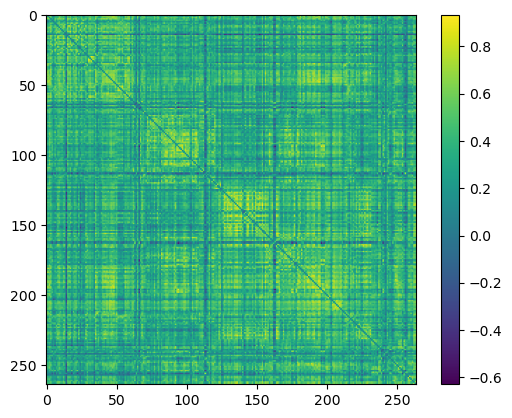

In [693]:
import matplotlib.pyplot as plt

one_minus_eye = np.ones((264,264))-np.eye(264)

plt.imshow(fc.getfcnp()[4]*one_minus_eye)
plt.imshow(emoidmat[30])
# plt.imshow(vec2mat(fakemats[1241]))
plt.colorbar()
plt.show()

In [379]:
import pickle

pickle.dump(fakemats, open('/home/anton/Documents/Tulane/Research/Work/Imputation/fake_nback264_5.pkl', 'wb'))

print('Done')

Done


In [218]:
subi = 1
age[subi], sex[subi], race[subi]

(9.0, 0, 0)